<a href="https://colab.research.google.com/github/brunops1/Desafio-Cesar-2021/blob/main/Desafio_Cesar_Bruno_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalações e Importações

In [24]:
!pip install sklearn # Instalação da biblioteca SKLearn (Modelos de Aprendizado de Maquinas)

In [25]:
import pandas as pd # Importando pandas para manipulação de Dados (DataFrame)

import numpy as np # Importando o numpy para operações matemáticas 

import seaborn as sns # Importando seaborn para análise gráfica
import matplotlib.pyplot as plt  # Importando o pyplot para análise gráfica

In [26]:
temperature_data = pd.read_csv('/content/Bias_correction_ucl.csv') # Lendo o dataset

# 1 - Análise Exploratória

In [27]:
# Verificando informações do dataset disponibilizado. Foi notado que em alguns atributos possuem valores nulos
temperature_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [28]:
# Limpando os valotes nulos do dataframe
new_temperature_data = temperature_data.dropna()

In [29]:
new_temperature_data.info() # Verificação da quantidade de dados por atributos e o tipo dos dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [30]:
new_temperature_data.head() # Verificação da formatação dos dados.

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [31]:
new_temperature_data.describe() # Estatística descritiva geral.

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


No handles with labels found to put in legend.


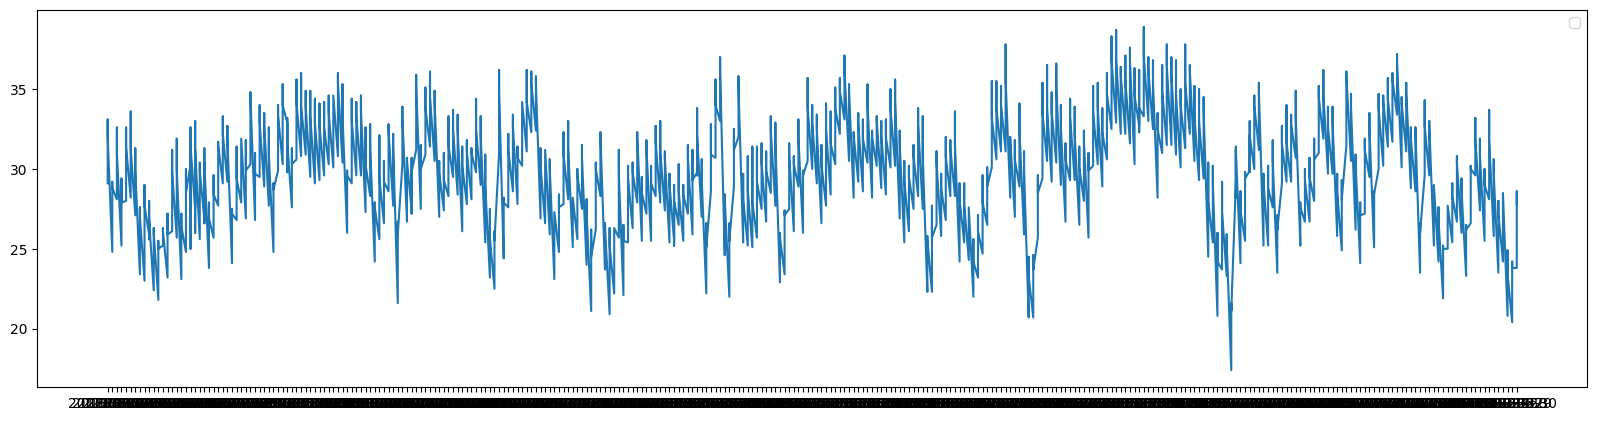

In [32]:
plt.figure(figsize=(20, 5), dpi=100)
plt.plot(new_temperature_data["Date"],new_temperature_data["Next_Tmax"])
plt.legend()
plt.show()

In [33]:
Present_Tmax = new_temperature_data.query('Present_Tmax==37.6')
Present_Tmax  #Temperatura máxima encontrada na data 11-08-2016

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
5717,18.0,2016-08-11,37.6,26.8,44.254253,87.745514,34.794021,27.150764,6.366598,111.225118,0.218892,0.094288,0.004283,0.000343,0.0,0.0,0.0,0.0,37.4832,127.024,56.4448,1.2313,5082.563477,37.0,27.8


In [34]:
Present_Tmin = new_temperature_data.query('Present_Tmin==23.1')
Present_Tmin.shape  #Temperatura minima foram encontrada 143 vezes

(143, 25)

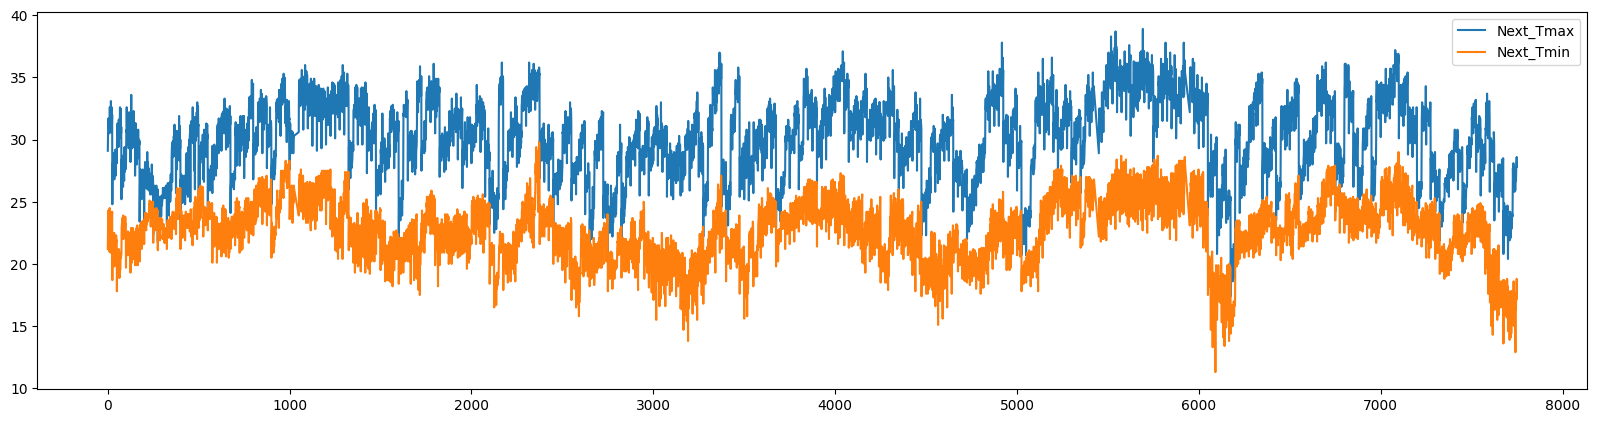

In [35]:
#Verificando a variação de temperatura máxima e mínima
plt.figure(figsize=(20, 5), dpi=100)
plt.plot(new_temperature_data["Next_Tmax"],label="Next_Tmax")
plt.plot(new_temperature_data["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

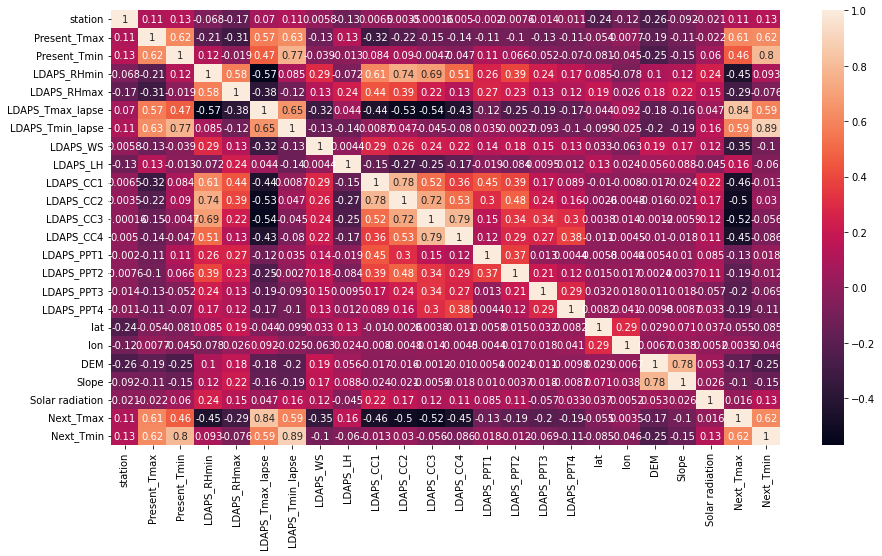

In [36]:
#Observando as correlações entre as variáveis
plt.figure( figsize=(15,8) ) 
sns.heatmap(new_temperature_data.corr(), annot=True) # Correlações entre as Variavéis
#Foram encontradas alfumas correçõas fortes entre a variável Next_Tmin com as variáveis LDAPS_Tmin_lapse e Present_Tmin.
#Outra correlação encontrada foi entre a variável Next_Tmax com as variáveis LDAPS_Tmax_lapse.

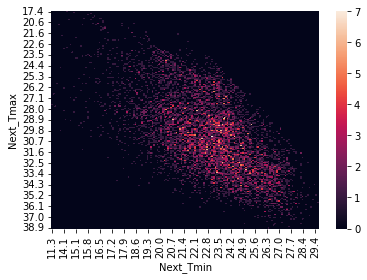

In [37]:
# Observando onde está a concentração de temperaturas máximas e mínimas
plt.figure()
sns.heatmap(pd.crosstab(new_temperature_data['Next_Tmax'],new_temperature_data['Next_Tmin']))
plt.show()

# 2 - Pré-processamento de dados

In [38]:
# Deletando a coluna que contém informação da data
del new_temperature_data['Date']

In [39]:
# dividindo o dataset em variaveis dependentes e independentes 

x = new_temperature_data.iloc[:,:22]
y = new_temperature_data.iloc[:,22]


# determinando o formato de x e y.
print(x.shape)
print(y.shape)


(7588, 22)
(7588,)


In [40]:
# Dividindo os dados em treinamento e teste 
from sklearn.model_selection  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Determinando o formato de treino e teste dos dados 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5691, 22)
(5691,)
(1897, 22)
(1897,)


In [41]:
# Fazendo preprocessamento dos dados com standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# 3 - Modelando Dados

In [42]:
# Importando o modelo de árvore aleatória regressor
from sklearn.ensemble import RandomForestRegressor
# Intanciando o modelo com 100 árvores de decisão
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
# Treinando os dados
rf.fit(x_train, y_train);

In [44]:
# Aplicando os dados de teste no modelo para fazer as predições
predictions = rf.predict(x_test)

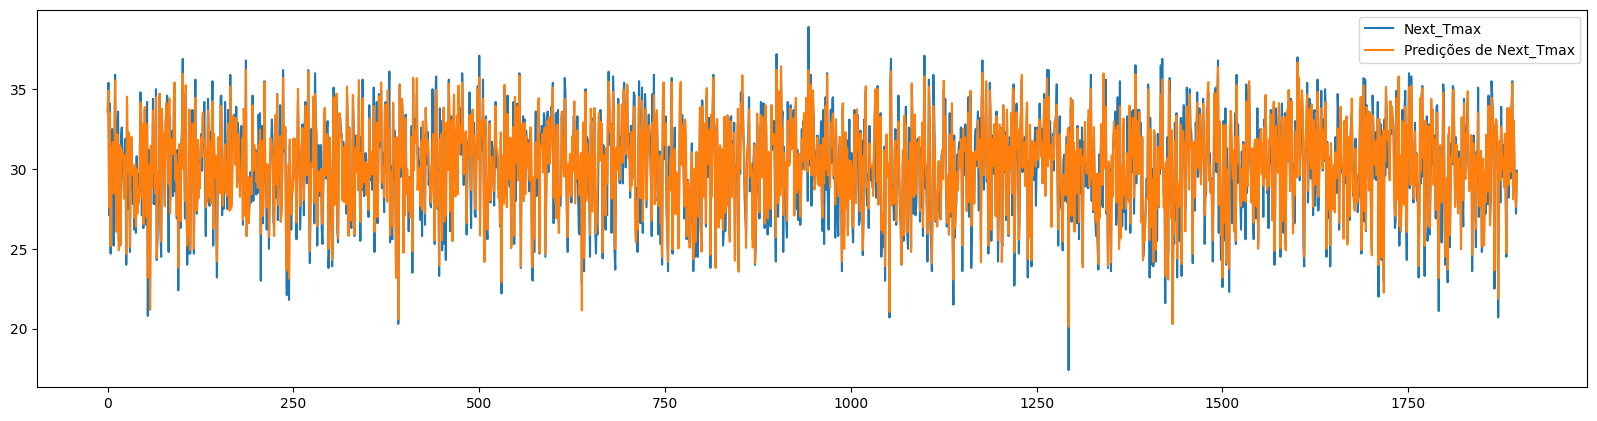

In [45]:
#Verificando que as predições(Next_Tmax) estão muito próximas da variável Next_Tmax
plt.figure(figsize=(20,5), dpi=100)
plt.plot(y_test.to_numpy(),label="Next_Tmax")
plt.plot(predictions,label="Predições de Next_Tmax")
plt.legend()
plt.show()

In [46]:
# Calculando as métricas
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.7646868740115969
Mean Squared Error: 1.014640717448602
Root Mean Squared Error: 1.0072937592622135
